In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = np.array(data)

In [41]:
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [42]:
X_train[:,0].shape

(784,)

In [25]:
np.arange(Y_train.size)

array([    0,     1,     2, ..., 39997, 39998, 39999], shape=(40000,))

In [62]:
#### Initializing parameters

def init_params():
    W1 = np.random.rand(100, 784) - 0.5
    b1 = np.random.rand(100, 1) - 0.5

    W2 = np.random.rand(10, 100) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(x, 0)

def deriv_ReLU(x):
    return x>0

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))
    

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T

    return one_hot_Y


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)

    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions , Y)
    return np.sum(predictions==Y)/Y.size

In [63]:
def gradient_descent(X,Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(1, iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1=W1, b1=b1, W2=W2, b2=b2, X=X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i%10==0:
            print("Iteration : ", i)
            print("Accuracy : ", get_accuracy(get_predictions(A2), Y))

    return W1, b1, W2, b2

In [64]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train,
                                  iterations=100, alpha=0.1)

Iteration :  10
[7 6 4 ... 3 0 2] [7 6 4 ... 3 6 2]
Accuracy :  0.45921951219512197
Iteration :  20
[7 6 4 ... 3 0 2] [7 6 4 ... 3 6 2]
Accuracy :  0.6136585365853658
Iteration :  30
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.6833414634146342
Iteration :  40
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.7246341463414634
Iteration :  50
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.7526341463414634
Iteration :  60
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.7712682926829268
Iteration :  70
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.7859512195121952
Iteration :  80
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.7981219512195122
Iteration :  90
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.8085609756097561
Iteration :  100
[7 6 4 ... 3 6 2] [7 6 4 ... 3 6 2]
Accuracy :  0.8170243902439024


In [65]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


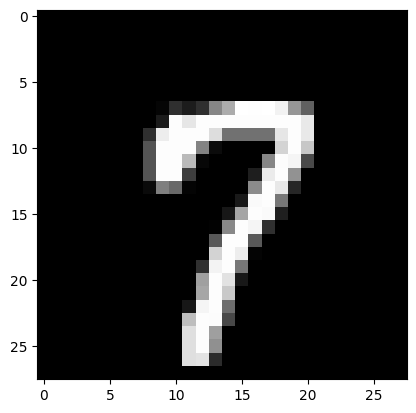

Prediction:  [6]
Label:  6


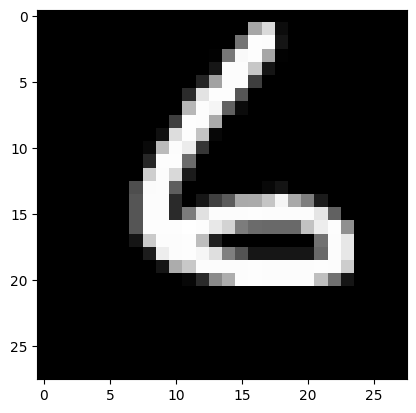

Prediction:  [4]
Label:  4


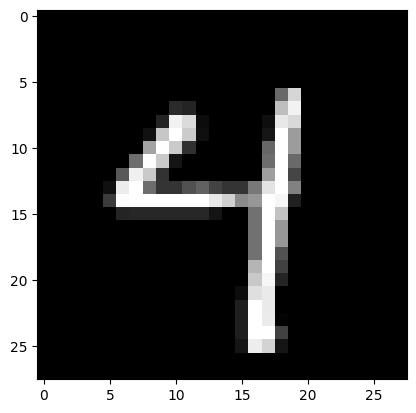

Prediction:  [8]
Label:  8


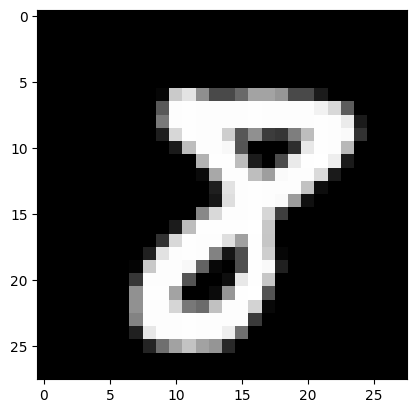

In [66]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)